# TP 8 Distribution Gaussienne
Dans ce TP, nous aimerions explorer le classifieur base sur les distributions gaussiennnes pour une classification binaire.



# Importation des librairies necessaires au travail

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
from sklearn.metrics import f1_score

In [2]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [3]:
# données
X = np.genfromtxt('X.csv', delimiter=',', dtype=float)
X.shape

(307, 2)

In [4]:
X1 = np.genfromtxt('Xval.csv', delimiter=',', dtype=float)
X1.shape

(307, 2)

In [5]:
y = np.genfromtxt('yval.csv', delimiter=',', dtype=float)
y.shape


(307,)

In [6]:
y = y.reshape(y.shape[0],1)
y.shape

(307, 1)

Dans ces données (data), les 2 premières colonnes representent les caracteristiques de l'ensemble d'entrainement.

Chaque ligne represente un exemple de notre ensemble de données. 


# Entrainement 
dans cette partie nous allons calculer les parametres de la disribution gaussienne de chaque caracteristique.

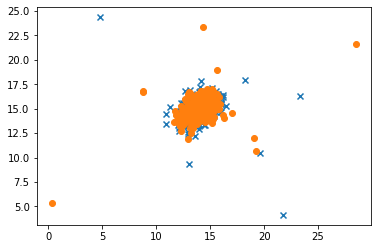

In [7]:
plt.scatter(X[:,0],X[:,1], marker ='x')
plt.scatter(X1[:,0],X1[:,1], marker ='o')

Mettons un lien avec ce que nous avons appris en regression linéaire

In [8]:
def mean_var(X):
    return np.mean(X, axis=0), np.var(X, axis=0)

In [9]:
m,v = mean_var(X)

In [10]:
m

array([14.11225277, 14.99767459])

In [11]:
v

array([1.8326777 , 1.70971534])

In [12]:
def calculProba(X,m,v):
    return (1 / (np.sqrt(2 * v * np.pi))) * np.exp(- np.power(X - m, 2) / (2 * v))

In [13]:
prob = calculProba(X, m, v)

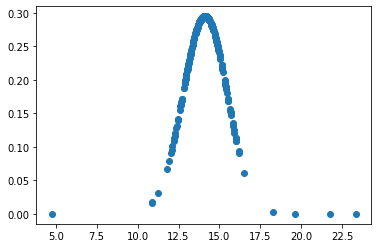

In [14]:
plt.scatter(X[:,0],prob[:,0])

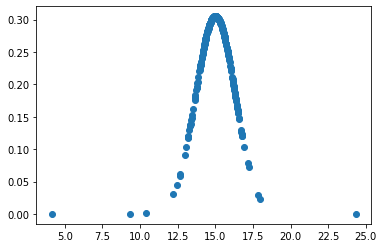

In [15]:
plt.scatter(X[:,1],prob[:,1])

In [16]:
def calcul_proba(X, m, v):
    proba = calculProba(X, m, v)
    return proba[:,0]*proba[:,1]

In [17]:


yproba = calcul_proba(X, m, v)


# **Partie 1: Reglage de Paramètre Epsilon**

In [18]:
def calcul_epsilon_f1score(y_proba, y, min, max, step):
    f1_scores = []
    for epsilon in np.arange(min, max, step):
        y_pred = np.ones(y_proba.shape)
        y_pred[y_proba >= epsilon] = 0
        f1_scores.append((epsilon, f1_score(y, y_pred)))
    return np.array(f1_scores)

In [19]:
f1 = calcul_epsilon_f1score(yproba, y, 0, 1, 0.0001)

In [20]:
f1.shape

(10000, 2)

In [21]:
def plot_epsilon_f1(f1):
    fig = plt.figure()
    plt.plot(f1[:,0],f1[:,1])
    plt.show()

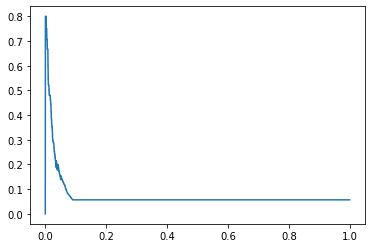

In [22]:
plot_epsilon_f1(f1)

**Concetré sur [0, 0.08] et minimiser step**

In [23]:
f1 = calcul_epsilon_f1score(yproba, y, 0, 0.08, 0.00001)

In [24]:
f1.shape

(8000, 2)

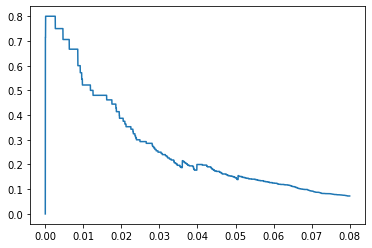

In [25]:
plot_epsilon_f1(f1)

In [26]:
def max_eps(f1):
    return f1[f1.argmax(axis=0)[1],:]

**Meilleur valeur pour Epsilon c'est:**


In [27]:
e = max_eps(f1)
e

array([7.e-05, 8.e-01])

In [28]:
e = e[0]

In [29]:
def predict(x, m, v, eps):
    proba = calculProba(x, m, v)

    yproba = proba[0]*proba[1]

    return 1 if yproba < eps else 0


In [30]:
y_pred = []
for x in X:
    y_pred.append(predict(x, m, v, e))



**F1Score de gaussianne univarié**

In [31]:
f1_score(y, y_pred)

0.8

# **Gaussienne Multivariée**

**Matrice de covariance**

In [32]:
# Covariance
def cov_m(x, y):
    xbar, ybar = x.mean(), y.mean()
    return np.sum((x - xbar)*(y - ybar))/(len(x) - 1)





In [33]:
# Covariance matrix
def cov_mat(X):
    return np.array([[cov_m(X[0], X[0]), cov_m(X[0], X[1])], \
                     [cov_m(X[1], X[0]), cov_m(X[1], X[1])]])

In [34]:
# Calculate covariance matrix 
cov_mat(X.T) # (or with np.cov(X.T))

array([[ 1.83866684, -0.22783493],
       [-0.22783493,  1.71530264]])

In [35]:
def gauss_multiple(x, cov, n, m):
  
  
    p1 = 1/(np.power(2*np.pi,n/2)*np.sqrt(np.linalg.det(cov)))
    p20 = np.transpose(x-m)

    p21 = np.linalg.inv(cov)

    p22 = x-m

    p2 = np.exp(-0.5*(p20.dot(p21).dot(p22)))
    return p1*p2

In [36]:
cov = cov_mat(X.T)
n = X.shape[1]

In [37]:
y_proba = [gauss_multiple(X[i,:], cov , n, m) for i in range(X.shape[0])]


In [38]:
y_proba = np.array(y_proba)

**Réglage de parametres Epsilon**

In [39]:
f1 = calcul_epsilon_f1score(y_proba, y, 0, 1, 0.0001)

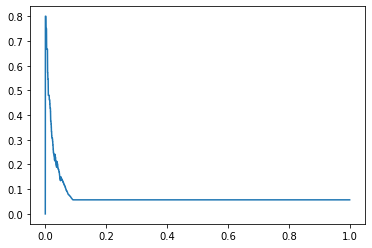

In [40]:
plot_epsilon_f1(f1)

In [41]:
f1 = calcul_epsilon_f1score(y_proba, y, 0, 0.08, 0.00001)

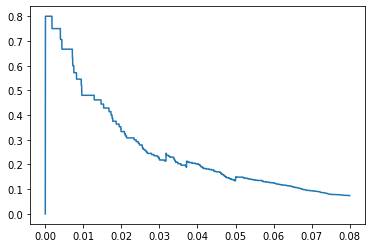

In [42]:
plot_epsilon_f1(f1)

**Meilleur valeur pour Epsilon c'est:**

In [43]:
e = max_eps(f1)
e

array([3.e-05, 8.e-01])

In [44]:
e = e[0]


In [45]:
e

3.0000000000000004e-05

In [46]:
def predict(y_proba, eps):

    return 1 if y_proba < eps else 0


In [47]:
y_predict = [predict(i, e) for i in y_proba]

In [48]:
y_predict[:5]

[0, 0, 0, 0, 0]

**F1Score pour gaussienne multivariée c'est**

In [49]:
f1_score(y, y_predict)

0.8

**On remarque le F1Score pour gaussienne univarié et gaussienne multivariée sont le meme**

# ***Visualisation en 3D***

**Génération des données**

In [50]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  

xx_train, yy_train = np.meshgrid(np.arange(x_min, x_max, 0.1),
                                 np.arange(y_min, y_max, 0.1))


In [51]:
xx_train.shape

(223, 206)

In [52]:
XX = np.c_[xx_train.ravel(), yy_train.ravel()]

In [53]:
XX.shape

(45938, 2)

In [54]:
m,v = mean_var(XX)

**Gaussienne Univarié**

In [55]:

z_proba = calcul_proba(XX, m, v)

In [56]:
z = np.array(z_proba).reshape(xx_train.shape)

In [58]:
def plot_3d(x,y,z):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.gca(projection='3d')
    ax.plot_surface(x, y, z, cmap=cm.coolwarm,linewidth=0, antialiased=True)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z');
    plt.show()

C:\Users\DELL\AppData\Local\Temp/ipykernel_5496/2480883261.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


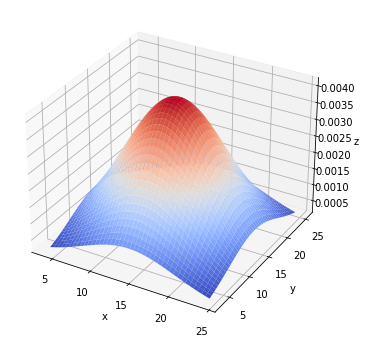

In [59]:
plot_3d(xx_train, yy_train, z)

**Gaussienne Multiple**

In [60]:
z_proba = [gauss_multiple(XX[i,:], cov , n, m) for i in range(XX.shape[0])]


In [61]:
z = np.array(z_proba).reshape(xx_train.shape)

C:\Users\DELL\AppData\Local\Temp/ipykernel_5496/2480883261.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


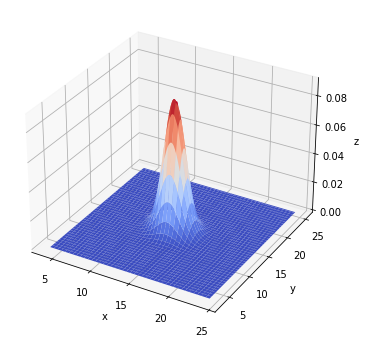

In [62]:
plot_3d(xx_train, yy_train, z)

# **Loi de Bayes**

Fonction de densité

In [63]:
def den(p, cov, x, m):
    cov_det = np.linalg.det(cov)
    cov_inv  = np.linalg.inv(cov)
    x_m_t = np.transpose(x-m)
    x_m = x-m
    return np.log(p)-0.5*np.log(cov_det)-0.5*(x_m_t.dot(cov_inv).dot(x_m))

In [64]:
y.shape

(307, 1)

get XX(Les exemples de classe i), cov(Matrice de covariance de classe i), mean(moyene de classe i), p (probabilité de classe i = #classe i/ #tout

In [65]:
def get_class_parametre(X,y,i):
    index = (y==i)
    XX = X[index[:,0],:].T
    cov = cov_mat(XX)
    mean = np.mean(XX, axis=1)
    p = y[index].shape[0]/y.shape[0]
    return XX, cov, mean, p

In [66]:
X0, cov0, m0, p0 = get_class_parametre(X,y,0)

In [67]:
X1, cov1, m1, p1 = get_class_parametre(X,y,1)

**Calcul de probabilté selon Loi de Bayes**

In [68]:
y_predict = np.zeros(y.shape[0])


P(x|w) c'est la fonction de densité :
p(w|x) = 1 si p(x|w1)Xp1 > p(x|w0)Xp0 sinon 1

In [69]:
for i in range(y.shape[0]):
    x = X[i,:]

    d0 = den(p0, cov0, x, m0)
    d1 = den(p1, cov1, x, m1)
    if(d1*p1 > d0*p0):
         y_predict[i] = 1



F1Score de loi de bayes:


In [70]:
f1_score(y, y_predict)

0.07964601769911506

# Travail à faire
- 1) Nous aimerions bien choisir le epsilon, ceci est fait en analysant le score F1 obtenu precedenmment
- 2) nous aimerions appliquer une gaussienne multivariée à nos caracterisqtues; et comparer les deux résultats (multiplication des gaussiennes univariées, et gaussienne multivariée)
- 3) Nous aimerions visualiser en 3D la multiplication des gaussiennes univariées et la gaussienne multivariée pour comparaison. 
- 4) **** En Bonus - PAS obligatoire **** : nous aimerions utiliser la loi de Bayes afin de classifier nos exemples. Pour cela, voir le cours.


# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le Lundi 23 Mai 2022 à 22h


In [ ]:
# bonne chance